<font color='red' size='5px'>1 Housing price prediction<font/>

<font color='blue' size='5px'>2 Example<font/>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Dense

In [4]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [5]:
df=pd.read_csv('kc_house_data.csv')

In [6]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## 2.1 Exploratory Data analysis

## 2.1.1 Missing data check

<AxesSubplot:>

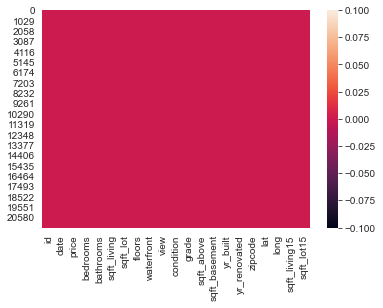

In [7]:
sns.heatmap(df.isnull())

In [13]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007547      0.234292      3.409825   
std    4.141264e+04      0.539683      0.086549      0.766390      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     291.725008   1970.999676     84.464787   
std        1.173200    827.759761     442.667800     29.375234    401.821438   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [8]:
df.describe().transpose()

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     21597.0  7.547345e-03  8.654900e-02  0.000000e+00   
view           21597.0  2.342918e-01  7.663898e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
sqft_basement  21597.0  2.917250e+02  4.426678e+02  0.000000e+00   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   21597.0  8.446479e+01  4.018214e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

<AxesSubplot:>

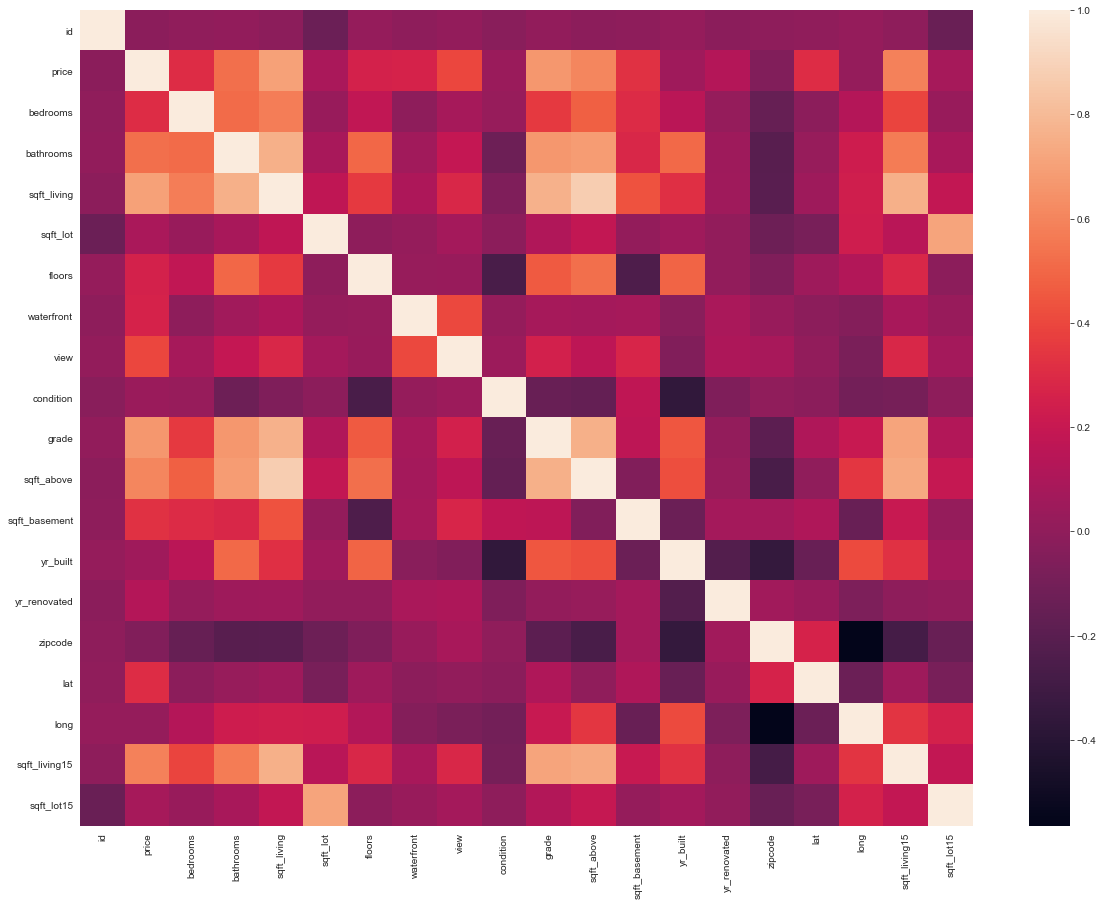

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

## 2.1.2 correlation

<Figure size 720x432 with 0 Axes>

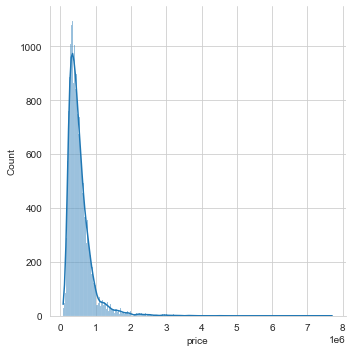

In [9]:
plt.figure(figsize=(10,6))
sns.displot(df['price'],kde=True)

In [10]:
df['price'].std()

367368.1401013936

In [11]:
df['price'].max()
    # We can neglect the outliers above 30 million

7700000.0

In [13]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.002727  0.266398 -0.006834   0.063744     0.103854  0.021632   
view           0.011536  0.397370  0.080008   0.188386     0.284709  0.074900   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement -0.005193  0.323799  0.302808   0.283440     0.435130  0.015418   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.016925  0.126424  0.018389   0.050544     0.055308  0.007686   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  waterfront      view  condition     grade  \
id             0.018608   -0.002727  0.011536  -0.023803  0.008188   
price          0.256804    0.266398  0.397370   0.036056  0.667951   
bedrooms       0.177944   -0.006834  0.080008   0.026496  0.356563   
bathrooms      0.502582    0.063744  0.188386  -0.126479  0.665838   
sqft_living    0.353953    0.103854  0.284709  -0.059445  0.762779   
sqft_lot      -0.004814    0.021632  0.074900  -0.008830  0.114731   
floors         1.000000    0.023755  0.028814  -0.264075  0.458794   
waterfront     0.023755    1.000000  0.401971   0.016611  0.082888   
view           0.028814    0.401971  1.000000   0.045999  0.251728   
condition     -0.264075    0.016611  0.045999   1.000000 -0.146896   
grade          0.458794    0.082888  0.251728  -0.146896  1.000000   
sqft_above     0.523989    0.072109  0.167609  -0.158904  0.756073   
sqft_basement -0.245715    0.080559  0.277078   0.173849  0.168220   
yr_built       0.489193   -0.026153 -0.053636  -0.361592  0.447865   
yr_renovated   0.006427    0.092873  0.103951  -0.060788  0.014261   
zipcode       -0.059541    0.030272  0.084622   0.002888 -0.185771   
lat            0.049239   -0.014306  0.005871  -0.015102  0.113575   
long           0.125943   -0.041904 -0.078107  -0.105877  0.200341   
sqft_living15  0.280102    0.086507  0.280681  -0.093072  0.713867   
sqft_lot15    -0.010722    0.030781  0.072904  -0.003126  0.120981   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010799      -0.005193  0.021617     -0.016925 -0.008211   
price            0.605368       0.323799  0.053953      0.126424 -0.053402   
bedrooms         0.479386       0.302808  0.155670      0.018389 -0.154092   
bathrooms        0.686668       0.283440  0.507173      0.050544 -0.204786   
sqft_living      0.876448       0.435130  0.318152      0.055308 -0.199802   
sqft_lot         0.184139       0.015418  0.052946      0.007686 -0.129586   
floors           0.523989      -0.245715  0.489193      0.006427 -0.059541   
waterfront       0.072109       0.080559 -0.026153      0.092873  0.030272   
view             0.167609       0.277078 -0.053636      0.103951  0.084622   
condition       -0.158904       0.173849 -0.361592     -0.060788  0.

In [43]:
df.corr()['price'].sort_values()
    # Explore highly correlated features with scatterplot

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

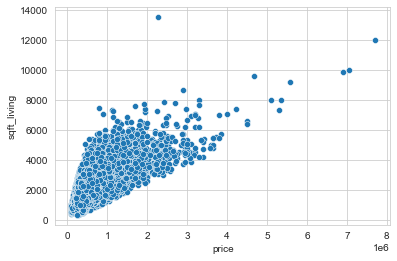

In [44]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

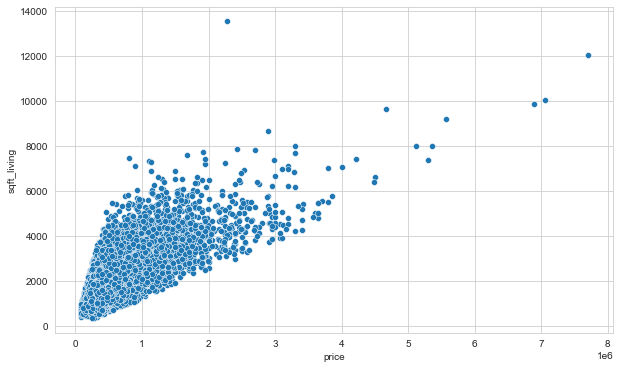

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

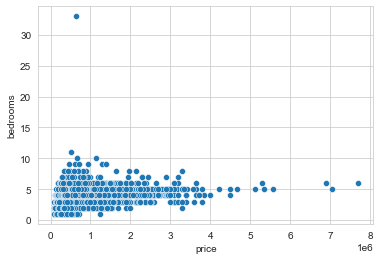

In [17]:
sns.scatterplot(x='price',y='bedrooms',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

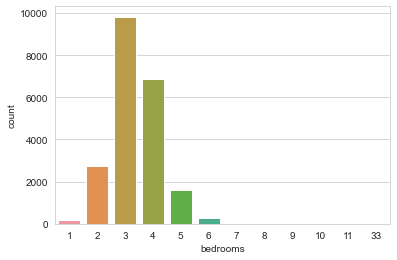

In [18]:
sns.countplot(x=df['bedrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

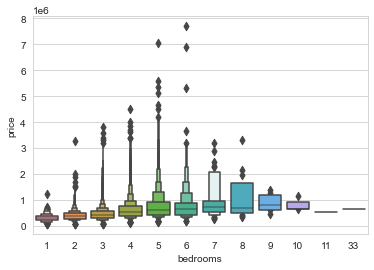

In [19]:
sns.boxenplot(x='bedrooms',y='price',data=df)
    # You can see,as the std of prices increase the number of bedrooms increase
    # Most variaty of prices range lies in between 3 to 7 bedroms.
    # That is the result of std of houses' bedroms lies in between 2 to 5 bedroms 

## 2.1.3 Plot data on map

In [64]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='lat'>

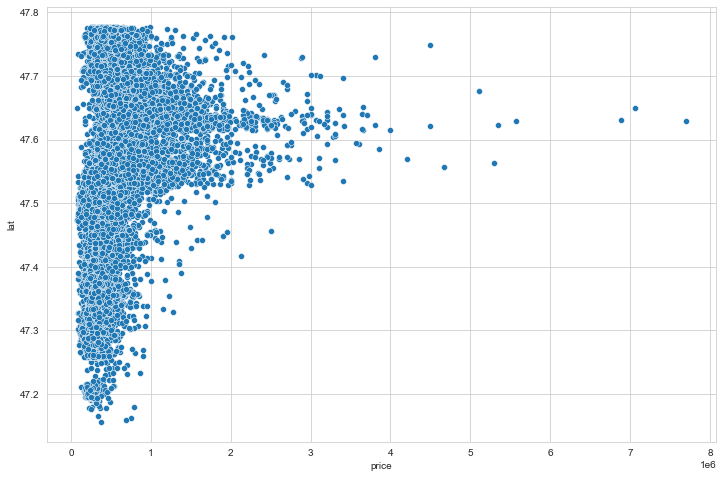

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)
    # At 47.6, you can see an expensive housing area

<AxesSubplot:xlabel='price', ylabel='long'>

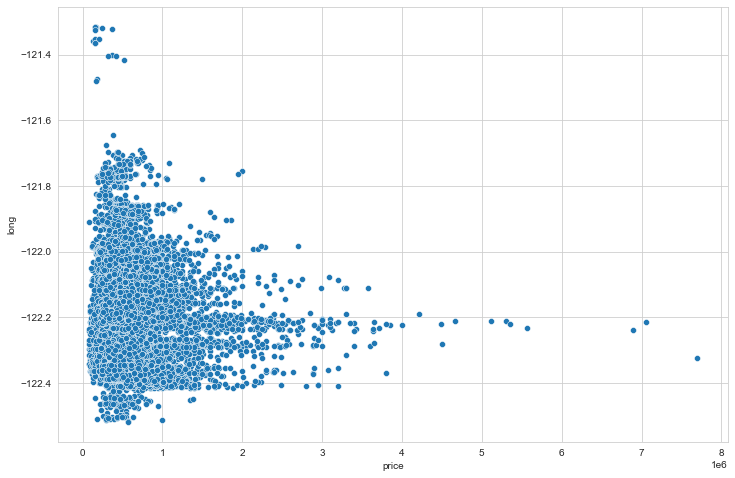

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)
    # At 122.2, you can see an expensive housing area

<AxesSubplot:xlabel='long', ylabel='lat'>

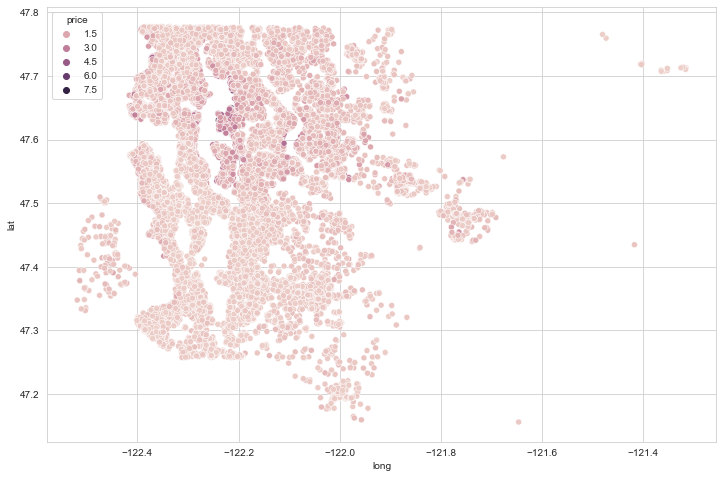

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')
    # At 47.6 and 122.2, we have a higher price housing area
    # Outliers cause a great gradient, so we want to drop them

## 2.1.4 Sample out outliers

In [7]:
df.sort_values('price',ascending=False).head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910   9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
1313   7558700030   4/13/2015  5300000.0         6       6.00         7390   
1162   1247600105  10/20/2014  5110000.0         5       5.25         8010   
8085   1924059029   6/17/2014  4670000.0         5       6.75         9640   
2624   7738500731   8/15/2014  4500000.0         5       5.50         6640   
8629   3835500195   6/18/2014  4490000.0         4       3.00         6430   
12358  6065300370    5/6/2015  4210000.0         5       6.00         7440   
4145   6447300265  10/14/2014  4000000.0         4       5.50         7080   
2083   8106100105  11/14/2014  3850000.0         4       4.25         5770   
7028    853200010    7/1/2014  3800000.0         5       5.50         7050   
19002  2303900100   9/11/2014  3800000.0         3       4.25         5510   
16288  7397300170   5/30/2014  3710000.0         4       3.50         5550   
18467  4389201095   5/11/2015  3650000.0         5       3.75         5020   
6502   4217402115   4/21/2015  3650000.0         6       4.75         5480   
15241  2425049063   9/11/2014  3640000.0         4       3.25         4830   
19133  3625049042  10/11/2014  3640000.0         5       6.00         5490   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245      27600     2.5           0     3  ...     13        8570   
3910      37325     2.0           1     2  ...     11        7680   
9245      31374     2.0           0     4  ...     13        8860   
4407      35069     2.0           0     0  ...     13        6200   
1446      23985     2.0           0     4  ...     12        6720   
1313      24829     2.0           1     4  ...     12        5000   
1162      45517     2.0           1     4  ...     12        5990   
8085      13068     1.0           1     4  ...     12        4820   
2624      40014     2.0           1     4  ...     12        6350   
8629      27517     2.0           0     0  ...     12        6430   
12358     21540     2.0           0     0  ...     12        5550   
4145      16573     2.0           0     0  ...     12        5760   
2083      21300     2.0           1     4  ...     11        5770   
7028      42840     1.0           0     2  ...     13        4320   
19002     35000     2.0           0     4  ...     13        4910   
16288     28078     2.0           0     2  ...     12        3350   
18467      8694     2.0           0     1  ...     12        3970   
6502      19401     1.5           1     4  ...     11        3910   
15241     22257     2.0           1     4  ...     11        4830   
19133     19897     2.0           0     0  ...     12        5490   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245            3480      1910          1987    98102  47.6298 -122.323   
3910            2360      1940          2001    98004  47.6500 -122.214   
9245            1030      2001             0    98039  47.6305 -122.240   
4407            3000      2001             0    98039  47.6289 -122.233   
1446            1280      2009             0    98004  47.6232 -122.220   
1313            2390      1991             0    98040  47.5631 -122.210   
1162            2020      1999             0    98033  47.6767 -122.211   
8085            4820      1983          2009    98040  47.5570 -122.210   
2624             290      2004             0    98155  47.7493 -122.280   
8629               0      2001             0    98004  47.6208 -122.219   
12358           1890      2003             0    98006  47.5692 -122.189   
4145            1320      

In [8]:
len(df)

21597

In [9]:
len(df)*.01
    # we want to sample out top 1% 

215.97

In [10]:
Bottom_99_percent=df.sort_values('price',ascending=False).iloc[216:]

In [11]:
Bottom_99_percent

id        date      price  bedrooms  bathrooms  sqft_living  \
6329    824059321    6/2/2014  1970000.0         4       3.50         4370   
12271  1923000260  10/15/2014  1960000.0         5       4.50         6200   
9166   3124059023   2/13/2015  1960000.0         3       1.75         3330   
12565  2806300065   4/22/2015  1960000.0         4       4.00         4430   
1150   4055701200   4/21/2015  1960000.0         4       2.75         3120   
...           ...         ...        ...       ...        ...          ...   
2139   1623049041    5/8/2014    82500.0         2       1.00          520   
8267   3883800011   11/5/2014    82000.0         3       1.00          860   
16184  3028200080   3/24/2015    81000.0         2       1.00          730   
465    8658300340   5/23/2014    80000.0         1       0.75          430   
15279    40000362    5/6/2014    78000.0         2       1.00          780   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
6329       8510     2.0           0     1  ...     10        3610   
12271     23373     3.0           0     1  ...     11        5050   
9166      12566     1.0           1     4  ...      8        1940   
12565     31353     2.0           0     0  ...     12        4430   
1150       7898     1.0           1     4  ...      8        1560   
...         ...     ...         ...   ...  ...    ...         ...   
2139      22334     1.0           0     0  ...      5         520   
8267      10426     1.0           0     0  ...      6         860   
16184      9975     1.0           0     0  ...      5         730   
465        5050     1.0           0     0  ...      4         430   
15279     16344     1.0           0     0  ...      5         780   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6329             760      2003             0    98004  47.5876 -122.204   
12271           1150      1988             0    98040  47.5632 -122.215   
9166            1390      1960             0    98040  47.5287 -122.220   
12565              0      1998             0    98005  47.6422 -122.157   
1150            1560      1963             0    98034  47.7165 -122.259   
...              ...       ...           ...      ...      ...      ...   
2139               0      1951             0    98168  47.4799 -122.296   
8267               0      1954             0    98146  47.4987 -122.341   
16184              0      1943             0    98168  47.4808 -122.315   
465                0      1912             0    98014  47.6499 -121.909   
15279              0      1942             0    98168  47.4739 -122.280   

       sqft_living15  sqft_lot15  
6329            2960       10347  
12271           3700       14486  
9166            3730       16560  
12565           3900       35237  
1150            2630       13868  
...              ...         ...  
2139            1572       10570  
8267            1140       11250  
16184            860        9000  
465             1200        7500  
15279           1700       10387  

[21381 rows x 21 columns]

<AxesSubplot:xlabel='long', ylabel='lat'>

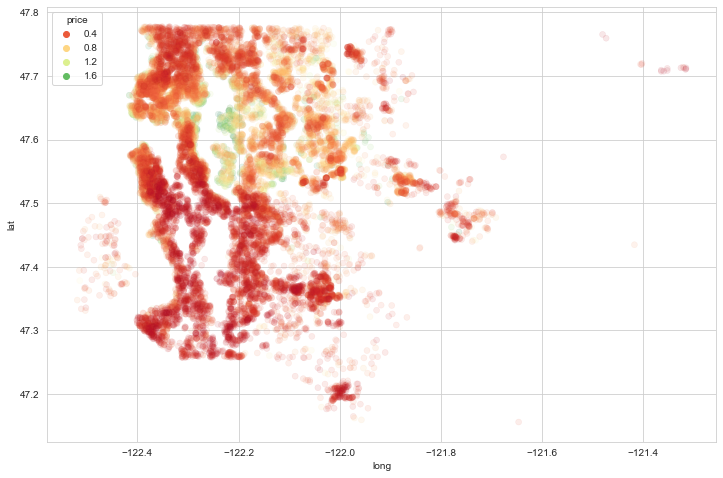

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=Bottom_99_percent,hue='price',alpha=.1,edgecolor=None,palette='RdYlGn')
    # You can see that along the edge of water the color will be lighter, as the price will be higher


<AxesSubplot:xlabel='waterfront', ylabel='price'>

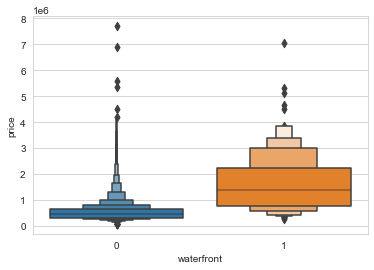

In [14]:
sns.boxenplot(x='waterfront',y='price',data=df)
    # Waterfront will be more expensive

## 3 Feature Engineering
- Get rid of non necessery feature
- Get a hidden feature from data
- Create dummy variables(Categorical feature)

In [13]:
 df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## 3.1 Drop unecessery data

In [14]:
df=df.drop('id',axis=1)

## 3.2 Dig new feature

In [15]:
df['date']=pd.to_datetime(df['date'])
    # To benefit from the date data we need to convert it to date object 

In [16]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

def year_extraction(date):
    return date.year

In [17]:
df['year']=df['date'].apply(lambda date:date.year)

In [18]:
df['month']=df['date'].apply(lambda ali: ali.month)

In [19]:
df=df.drop('date',axis=1)

In [20]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...              0      1955             0   
1     0          3      7  ...            400      1951          1991   
2     0          3      6  ...              0      1933             0   
3     0          5      7  ...            910      1965             0   
4     0          3      8  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year  month  
0    98178  47.5112 -122.257           1340        5650  2014     10  
1    98125  47.7210 -122.319           1690        7639  2014     12  
2    98028  47.7379 -122.233           2720        8062  2015      2  
3    98136  47.5208 -122.393           1360        5000  2014     12  
4    98074  47.6168 -122.045           1800        7503  2015      2  

[5 rows x 21 columns]

## 3.3 Explore the effect of the new feature



<AxesSubplot:xlabel='month', ylabel='price'>

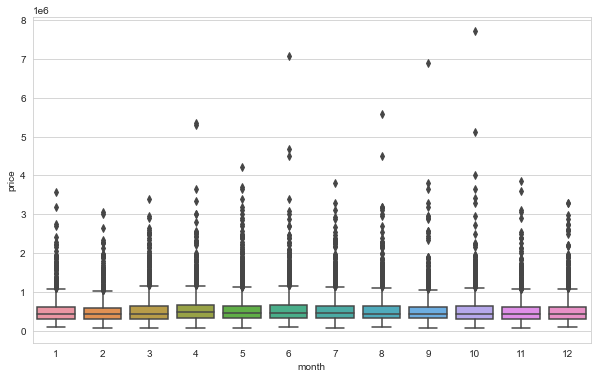

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price',x='month',data=df)
    # boxplot will group data by x then plot it against y

In [22]:
df.groupby('month').mean()

price  bedrooms  bathrooms  sqft_living      sqft_lot  \
month                                                                  
1      525963.251534  3.387526   2.129346  2085.094070  17869.721881   
2      508520.051323  3.347233   2.062550  2012.901363  13694.825180   
3      544057.683200  3.367467   2.065333  2021.968533  15604.088533   
4      562215.615074  3.367878   2.107896  2060.743831  14273.263795   
5      550849.746893  3.363712   2.116508  2090.514913  16678.293289   
6      557534.318182  3.421488   2.165863  2131.163912  14258.142792   
7      544892.161013  3.391678   2.146540  2128.246495  13857.654907   
8      536655.212481  3.357401   2.123388  2085.100567  14643.078391   
9      529723.517787  3.365330   2.133117  2079.319593  15365.775833   
10     539439.447228  3.364072   2.120203  2085.705224  15389.313433   
11     522359.903478  3.337828   2.080554  2049.625976  15257.222143   
12     524799.902041  3.393197   2.104422  2091.761905  15337.904082   

         floors  waterfront      view  condition     grade   sqft_above  \
month                                                                     
1      1.478528    0.008180  0.246421   3.347648  7.642127  1814.019427   
2      1.466319    0.004812  0.242181   3.405774  7.558140  1727.935846   
3      1.464267    0.006933  0.238933   3.355733  7.588267  1740.604800   
4      1.495065    0.008524  0.230597   3.358905  7.651413  1777.883804   
5      1.486123    0.005385  0.239022   3.420464  7.674399  1780.695940   
6      1.512167    0.008724  0.241047   3.460514  7.736915  1820.423324   
7      1.522162    0.006784  0.221167   3.442786  7.716870  1841.531886   
8      1.499484    0.006189  0.223311   3.440433  7.685921  1798.394533   
9      1.491248    0.008470  0.249012   3.431959  7.644833  1786.968379   
10     1.503465    0.008529  0.244670   3.412047  7.643923  1788.792111   
11     1.500710    0.010646  0.221434   3.403123  7.613911  1776.386089   
12     1.486735    0.008163  0.217007   3.395238  7.657823  1787.294558   

       sqft_basement     yr_built  yr_renovated       zipcode        lat  \
month                                                                      
1         271.074642  1971.749489     73.433538  98077.897751  47.553500   
2         284.965517  1971.418605     51.178027  98076.716119  47.546850   
3         281.363733  1970.597333     82.976533  98077.578667  47.553377   
4         282.860027  1971.731270     70.733961  98078.967250  47.560614   
5         309.818973  1970.216653    105.121375  98079.094863  47.565075   
6         310.740588  1970.723600     80.617080  98079.596419  47.565513   
7         286.714609  1971.777024     92.125283  98074.758933  47.560198   
8         286.706034  1972.044353     78.234141  98077.033522  47.564750   
9         292.351214  1970.534161     99.215697  98078.513834  47.560654   
10        296.913113  1970.111407     94.574094  98078.598081  47.562249   
11        273.239886  1970.094393     87.698368  98078.589780  47.557950   
12        304.467347  1971.259184     77.463265  98077.559184  47.559604   

             long  sqft_living15    sqft_lot15         year  
month                                                        
1     -122.212188    1975.859918  12687.026585  2015.000000  
2     -122.216140    1944.269447  11595.312751  2015.000000  
3     -122.214041    1951.490133  12678.426133  2015.000000  
4     -122.213484    1986.577389  12653.579632  2015.000000  
5     -122.214854    1990.449876  13694.719553  2014.267606  
6     -122.214423    2033.827824  12835.893939  2014.000000  
7     -122.206664    2029.130710  12584.116689  2014.000000  
8     -122.209769    1995.968025  12966.646209  2014.000000  
9     -122.213067    1983.068888  11887.396951  2014.000000  
10    -122.217264    1981.493070  12880.621002  2014.000000  
11    -122.218528    1940.954578  12951.010646  2014.000000  
12    -122.221068    1976.670068  13095.555102  2014.000000

<AxesSubplot:xlabel='month'>

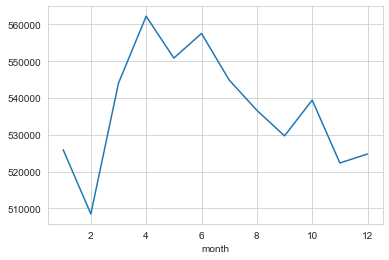

In [23]:
df.groupby('month')['price'].mean().plot()
    # Here we can see that there is not much of a difference

<AxesSubplot:xlabel='year'>

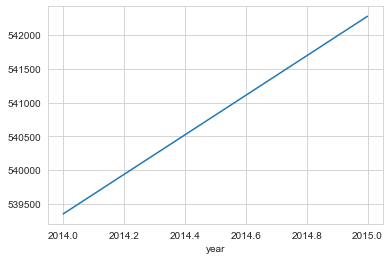

In [24]:
df.groupby('year')['price'].mean().plot()
    # Here you can see the effect of inflation

## 3.4 Categorical Feature

Zipcode here can indiacte the price in different location if we turned it to categories, or if we grouped regions depending on zipcode

In [25]:
df['zipcode'].value_counts()
    # here the zipcode consist of many categories, so we will just drop it
    # In real life you will map this location manually from the map
        # Divide the map into south, east, west, south

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [26]:
df=df.drop('zipcode',axis=1)

## 3.5.1 Turn a continuous variable into category or not

In [27]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  year  month  
0  47.5112 -122.257           1340        5650  2014     10  
1  47.7210 -122.319           1690        7639  2014     12  
2  47.7379 -122.233           2720        8062  2015      2  
3  47.5208 -122.393           1360        5000  2014     12  
4  47.6168 -122.045           1800        7503  2015      2

In [28]:
df['yr_renovated'].value_counts()
    # Here the zero means it was never renovated 
    # We can divide the data into renovated and not renovated
    # Here we don't need to set a category, as:
        # We expect the more recent the renovation the higher the price
        # The lowest value is zero already

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

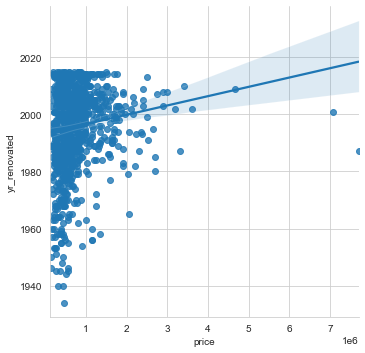

In [29]:
sns.lmplot(y='yr_renovated',x='price',data=df[df['yr_renovated']!=0])

In [30]:
df['sqft_basement'].value_counts()
    # Here is the same idea, you will have an increasing values no need to make categories

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

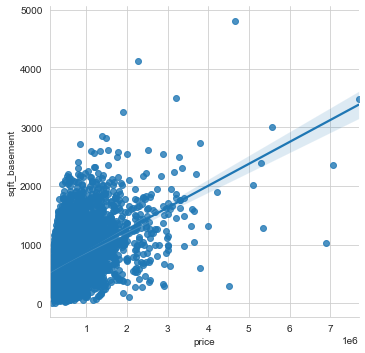

In [31]:
sns.lmplot(x='price',y='sqft_basement',data=df[df['sqft_basement']!=0])

## 4 Preprocessing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  year  month  
0  47.5112 -122.257           1340        5650  2014     10  
1  47.7210 -122.319           1690        7639  2014     12  
2  47.7379 -122.233           2720        8062  2015      2  
3  47.5208 -122.393           1360        5000  2014     12  
4  47.6168 -122.045           1800        7503  2015      2

In [34]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

X=df.drop('price',axis=1).values
y=df['price'].values

In [35]:
y=df['price'].values

In [36]:
X=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month']].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
scaler.fit(X_train)

MinMaxScaler()

In [41]:
X_train=scaler.transform(X_train)

In [42]:
X_test=scaler.transform(X_test)

## 5 Model Creating

In [43]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [44]:
X_train.shape

(15117, 19)

In [45]:
# The Value of the neurons in each layer will be the same as the number of input feature
# We can use early stopping to define the number of epochs to train with
# If we increased the number of layer we may cause overfitting

In [46]:
NN_model=Sequential()
NN_model.add(Dense(19,activation='relu'))
NN_model.add(Dense(19,activation='relu'))
NN_model.add(Dense(19,activation='relu'))
NN_model.add(Dense(19,activation='relu'))
NN_model.add(Dense(1))

In [48]:
NN_model.compile(optimizer='adam',loss='mse')
    # Adam optimizer used to 

## 6 Training the model
   - During training we need to validate our training process, so we will use a seperate data set and compare the result
   - The Validation is used to make sure that our data is not over fitting on the model parameters
   - There is two way to make validation set:
       - To use test set as validation set
       - To split the training set into two set 
   - We use validation to know what is happening during our training to imporve the end result

In [91]:
from IPython.display import Image

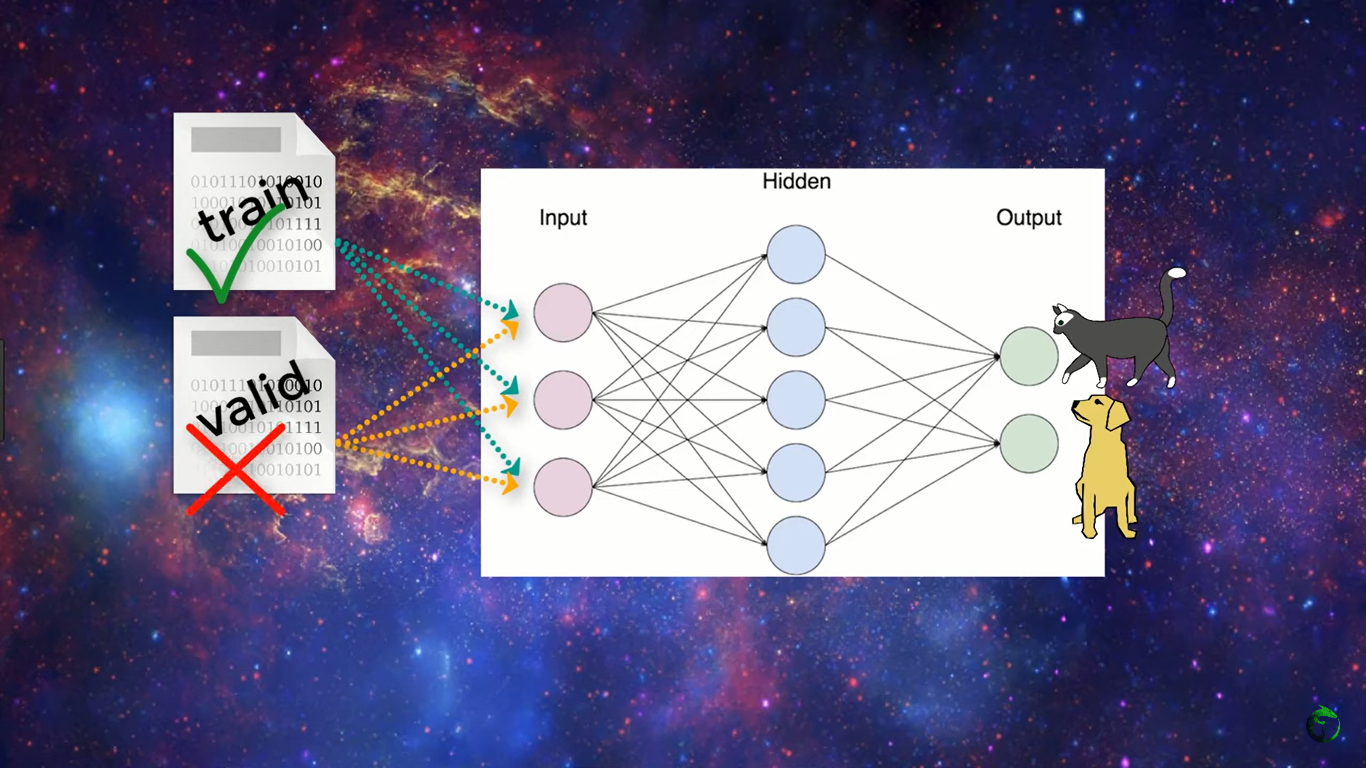

In [51]:
Image('Validation (1).png')

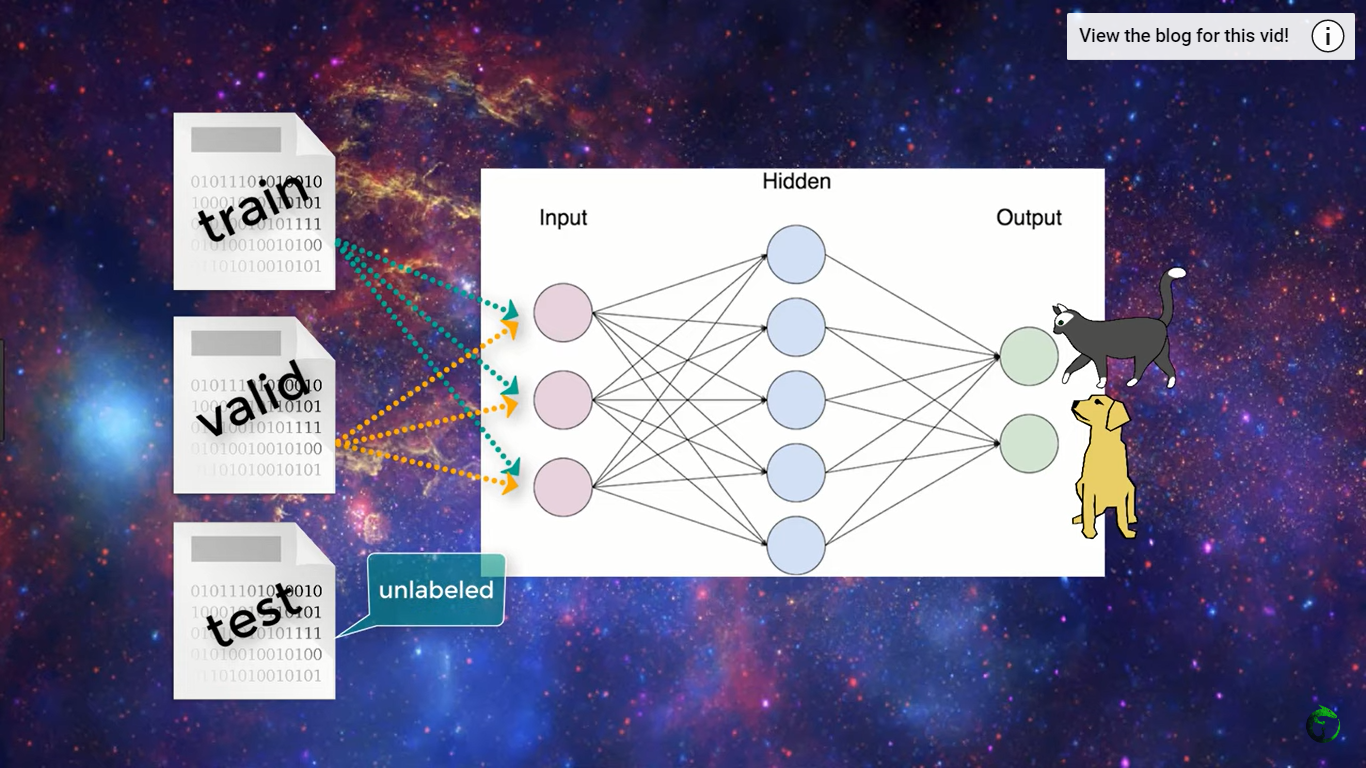

In [52]:
Image('Validation (2).png')

## 6.1 Validation using test set

In [49]:
NN_model.fit(x=X_train,y=y_train,epochs=400,verbose=1,validation_data=(X_test,y_test),batch_size=128)
    # We can use validtion to check if we are doing well during our training
    # NN won't update biases or weights depending on validation
    # validation to check if we are overfitting
    # batch_size: used if a large data set
        # batch_size: used with value as power of two
        # Smaller batch_size will take longer to run, but will reduce the chance of over fitting

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430229553152.0000 - val_loss: 418848833536.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 428116672512.0000 - val_loss: 411477671936.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 399602810880.0000 - val_loss: 348341764096.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 279377149952.0000 - val_loss: 179052314624.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 129226366976.0000 - val_loss: 96940154880.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 98422759424.0000 - val_loss: 94135615488.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 96276291584.0000 - val_loss: 92393709568.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 94451032064.0000 - val_loss: 90661085184.0000
Epoch 9/400
119/119 [==

Epoch 68/400
119/119 [==============================] - 0s 1ms/step - loss: 36879118336.0000 - val_loss: 35588894720.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 36776976384.0000 - val_loss: 35458899968.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 36574097408.0000 - val_loss: 35299082240.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 36436525056.0000 - val_loss: 35148406784.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 36329402368.0000 - val_loss: 35063308288.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 36216610816.0000 - val_loss: 34936942592.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 36093243392.0000 - val_loss: 34785624064.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 35978121216.0000 - val_loss: 34669703168.0000
Epoch 76/400
119/119 [==

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32798947328.0000 - val_loss: 31335127040.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32748947456.0000 - val_loss: 31301406720.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32726243328.0000 - val_loss: 31274534912.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32684406784.0000 - val_loss: 31261736960.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32645720064.0000 - val_loss: 31194099712.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32587585536.0000 - val_loss: 31178151936.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32582371328.0000 - val_loss: 31100078080.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32544651264.0000 - val_loss: 31060144128.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 30359764992.0000 - val_loss: 28392187904.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30392045568.0000 - val_loss: 28339853312.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 30390673408.0000 - val_loss: 28324245504.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 30349195264.0000 - val_loss: 28310042624.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30324508672.0000 - val_loss: 28392452096.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30326458368.0000 - val_loss: 28613445632.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 30310713344.0000 - val_loss: 28309389312.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30334107648.0000 - val_loss: 28277657600.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 28972488704.0000 - val_loss: 26761783296.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29013690368.0000 - val_loss: 26629060608.0000


In [50]:
Residual=pd.DataFrame(NN_model.history.history)

<AxesSubplot:>

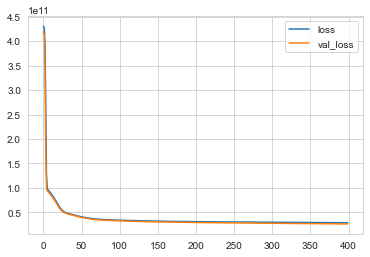

In [51]:
Residual.plot()
    # This is the shape we want where you both training and validation decrease with no increase
    # The decrease in validation means we can still continue training without being afraid of overfitting
    # If the validation losses started to increase means you are overfitting on training data
    # If we found out an increase in validation losses you will perform an early stopping

## 6.2  Validation using a split from training

In [84]:
NN_model.fit(X_train,y_train,validation_split=.2,batch_size=128,verbose=1,epochs=500)

Epoch 1/500
95/95 [==============================] - 0s 2ms/step - loss: 12040239104.0000 - val_loss: 13316574208.0000
Epoch 2/500
95/95 [==============================] - 0s 1ms/step - loss: 12084681728.0000 - val_loss: 13555774464.0000
Epoch 3/500
95/95 [==============================] - 0s 1ms/step - loss: 12030745600.0000 - val_loss: 13913986048.0000
Epoch 4/500
95/95 [==============================] - 0s 1ms/step - loss: 12026225664.0000 - val_loss: 13739225088.0000
Epoch 5/500
95/95 [==============================] - 0s 1ms/step - loss: 11967179776.0000 - val_loss: 13732569088.0000
Epoch 6/500
95/95 [==============================] - 0s 1ms/step - loss: 12061857792.0000 - val_loss: 13850755072.0000
Epoch 7/500
95/95 [==============================] - 0s 1ms/step - loss: 11963561984.0000 - val_loss: 13902729216.0000
Epoch 8/500
95/95 [==============================] - 0s 1ms/step - loss: 11979218944.0000 - val_loss: 13902353408.0000
Epoch 9/500
95/95 [=============================

95/95 [==============================] - 0s 1ms/step - loss: 11594389504.0000 - val_loss: 16032100352.0000
Epoch 138/500
95/95 [==============================] - 0s 1ms/step - loss: 11590274048.0000 - val_loss: 16424425472.0000
Epoch 139/500
95/95 [==============================] - 0s 1ms/step - loss: 11599205376.0000 - val_loss: 16133714944.0000
Epoch 140/500
95/95 [==============================] - 0s 1ms/step - loss: 11631512576.0000 - val_loss: 16326679552.0000
Epoch 141/500
95/95 [==============================] - 0s 1ms/step - loss: 11569653760.0000 - val_loss: 16468834304.0000
Epoch 142/500
95/95 [==============================] - 0s 2ms/step - loss: 11628648448.0000 - val_loss: 16012304384.0000
Epoch 143/500
95/95 [==============================] - 0s 2ms/step - loss: 11580517376.0000 - val_loss: 16099675136.0000
Epoch 144/500
95/95 [==============================] - 0s 2ms/step - loss: 11605734400.0000 - val_loss: 16177712128.0000
Epoch 145/500
95/95 [=========================

Epoch 205/500
95/95 [==============================] - 0s 1ms/step - loss: 11477238784.0000 - val_loss: 16758718464.0000
Epoch 206/500
95/95 [==============================] - 0s 1ms/step - loss: 11486414848.0000 - val_loss: 16741130240.0000
Epoch 207/500
95/95 [==============================] - 0s 1ms/step - loss: 11448595456.0000 - val_loss: 16986235904.0000
Epoch 208/500
95/95 [==============================] - 0s 1ms/step - loss: 11534139392.0000 - val_loss: 16545845248.0000
Epoch 209/500
95/95 [==============================] - 0s 1ms/step - loss: 11462983680.0000 - val_loss: 16983270400.0000
Epoch 210/500
95/95 [==============================] - 0s 1ms/step - loss: 11515004928.0000 - val_loss: 16785283072.0000
Epoch 211/500
95/95 [==============================] - 0s 1ms/step - loss: 11506362368.0000 - val_loss: 16744324096.0000
Epoch 212/500
95/95 [==============================] - 0s 1ms/step - loss: 11549303808.0000 - val_loss: 16660663296.0000
Epoch 213/500
95/95 [===========

Epoch 340/500
95/95 [==============================] - 0s 3ms/step - loss: 11268568064.0000 - val_loss: 17838407680.0000
Epoch 341/500
95/95 [==============================] - 0s 2ms/step - loss: 11290144768.0000 - val_loss: 17661997056.0000
Epoch 342/500
95/95 [==============================] - 0s 2ms/step - loss: 11306206208.0000 - val_loss: 17132300288.0000
Epoch 343/500
95/95 [==============================] - 0s 1ms/step - loss: 11296912384.0000 - val_loss: 17443110912.0000
Epoch 344/500
95/95 [==============================] - 0s 2ms/step - loss: 11310019584.0000 - val_loss: 17557010432.0000
Epoch 345/500
95/95 [==============================] - 0s 2ms/step - loss: 11293143040.0000 - val_loss: 17712023552.0000
Epoch 346/500
95/95 [==============================] - 0s 5ms/step - loss: 11303478272.0000 - val_loss: 17845071872.0000
Epoch 347/500
95/95 [==============================] - 0s 2ms/step - loss: 11302711296.0000 - val_loss: 17589059584.0000
Epoch 348/500
95/95 [===========

95/95 [==============================] - 0s 3ms/step - loss: 11122738176.0000 - val_loss: 18178979840.0000
Epoch 475/500
95/95 [==============================] - 0s 2ms/step - loss: 11162645504.0000 - val_loss: 18500468736.0000
Epoch 476/500
95/95 [==============================] - 0s 2ms/step - loss: 11085592576.0000 - val_loss: 18070196224.0000
Epoch 477/500
95/95 [==============================] - 0s 2ms/step - loss: 11129328640.0000 - val_loss: 18469779456.0000
Epoch 478/500
95/95 [==============================] - 0s 2ms/step - loss: 11141967872.0000 - val_loss: 18363523072.0000
Epoch 479/500
95/95 [==============================] - 0s 2ms/step - loss: 11121432576.0000 - val_loss: 18407976960.0000
Epoch 480/500
95/95 [==============================] - 0s 2ms/step - loss: 11173042176.0000 - val_loss: 18371823616.0000
Epoch 481/500
95/95 [==============================] - 0s 2ms/step - loss: 11102957568.0000 - val_loss: 18014216192.0000
Epoch 482/500
95/95 [=========================

In [67]:
Residual=pd.DataFrame(NN_model.history.history)

In [ ]:
plt.plot(Residual)

## 7 Prediction 

In [52]:
y_pred=NN_model.predict(X_test)

## 8 Evaluation

## 8.1 Visiual Evaluation

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

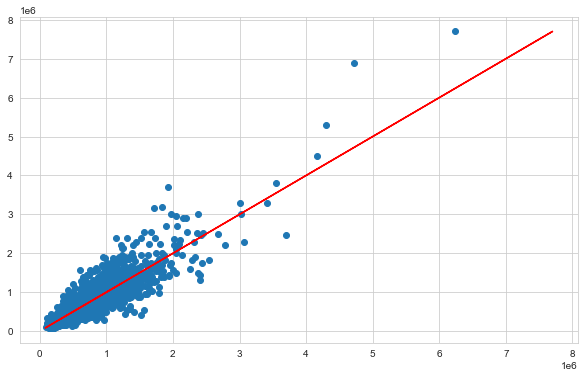

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred,y_test)
plt.plot(y_test,y_test,'r')
    # The red line gives the best fit possible (It can also mean the mean)
    # The outlier caused a shift 

## 8.2 Numerical Evaluation 
   - To make a sense out of data we have to compare it to a meaningful value like mean and median

In [57]:
y_test.mean()

535139.1662037037

In [58]:
np.median(y_test)

449500.0

<AxesSubplot:ylabel='Count'>

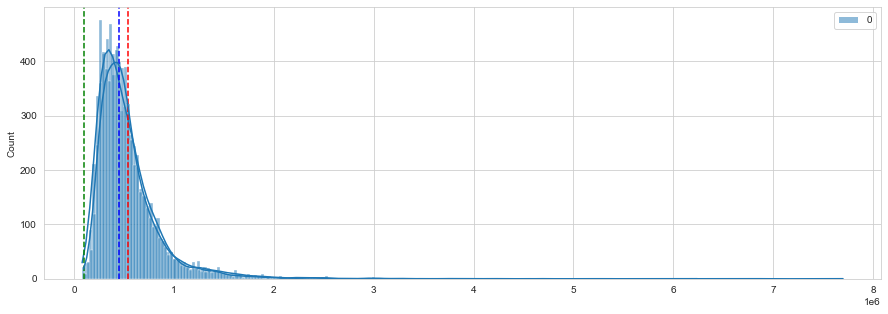

In [74]:
plt.figure(figsize=(15,5))
sns.histplot(y_test,kde=True)
plt.axvline(np.mean(y_test),color='r', linestyle='--')
plt.axvline(np.median(y_test),color='b', linestyle='--')
plt.axvline(mean_absolute_error(y_test,y_pred),color='g', linestyle='--')

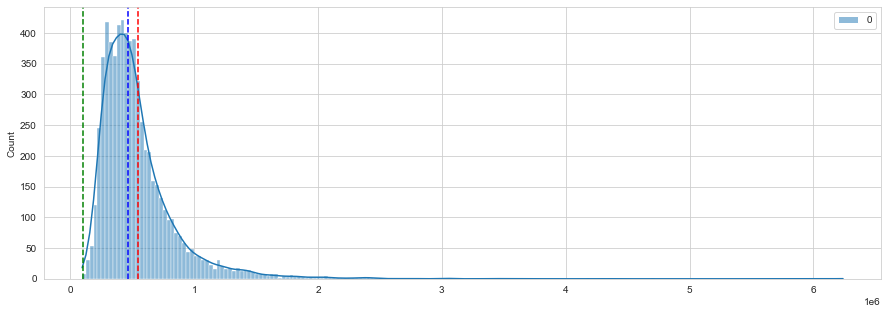

In [78]:
plt.figure(figsize=(15,5))
sns.histplot(y_pred,kde=True)
plt.axvline(np.mean(y_pred),color='r', linestyle='--')
plt.axvline(np.median(y_pred),color='b', linestyle='--')
plt.axvline(mean_absolute_error(y_test,y_pred),color='g', linestyle='--')

Help on Line2D in module matplotlib.lines object:

class Line2D(matplotlib.artist.Artist)
 |  Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
 |  
 |  A line - the line can have both a solid linestyle connecting all
 |  the vertices, and a marker at each vertex.  Additionally, the
 |  drawing of the solid line is influenced by the drawstyle, e.g., one
 |  can create "stepped" lines in various styles.
 |  
 |  Method resolution order:
 |      Line2D
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgec

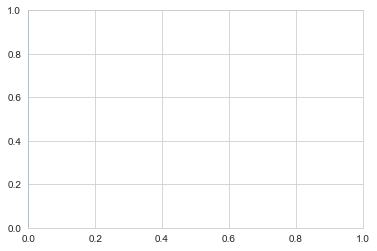

In [119]:
help(plt.axvline())

In [63]:
mean_absolute_error(y_test,y_pred)

101740.68593991126

In [66]:
mean_absolute_error(y_test,y_pred)/y_test.mean()
    # To make a sence out of data we have to compare the values
    # That means we are off by 20 percent
    # We can train more to imporve it as we didn't reach overfitting

0.19012005168984977

In [61]:
np.sqrt(mean_squared_error(y_test,y_pred))

163184.11272015318

In [65]:
df['price'].describe()
    # To get all the data to compare to

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

## 8.2.1 Explained Variance
   - Used to tell us how much variance is being explained by your model
   - Strong correlation leands to a large value of variance
   - A value of 1 means we perfectly predict the variance
   - It calculates the variance around the mean of both data set

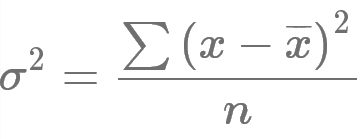

In [92]:
Image('variance-formula.png')

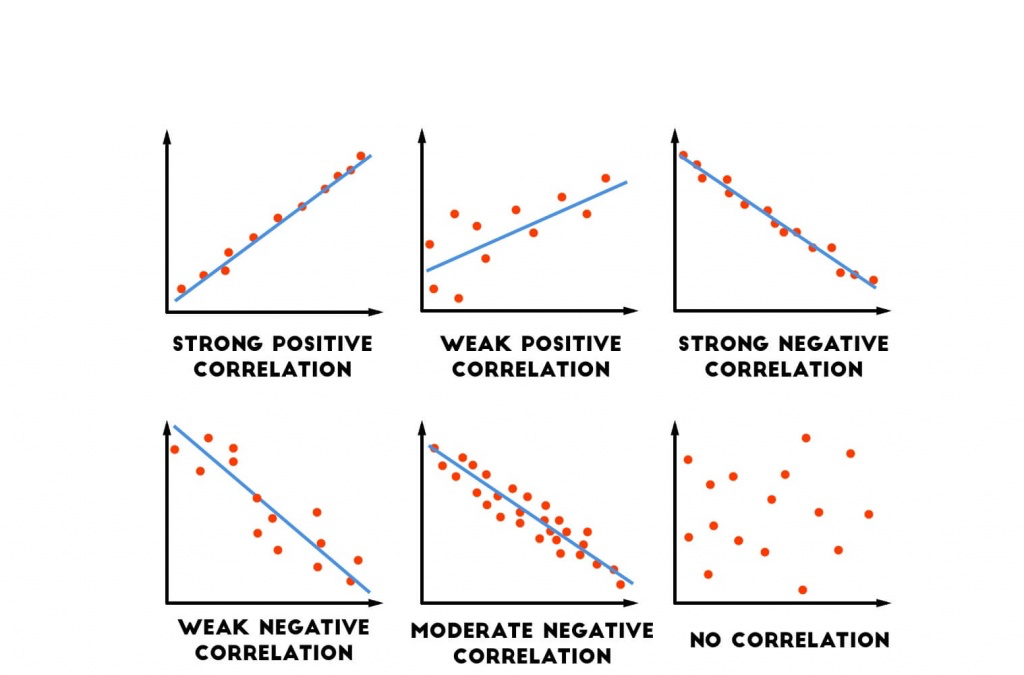

In [93]:
Image('Varriance and correlation.png')

In [90]:
explained_variance_score(y_test,y_pred)

0.7995787235776157

<Figure size 1080x360 with 0 Axes>

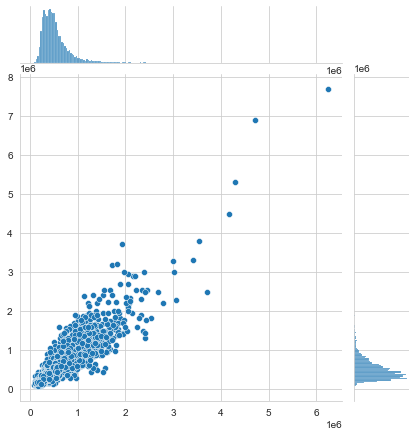

In [88]:
plt.figure(figsize=(15,5))
sns.jointplot(y_pred.reshape(6480),y_test.reshape(6480))

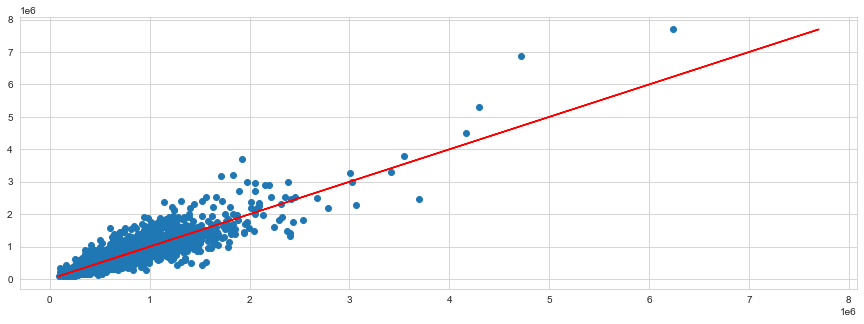

In [89]:
plt.figure(figsize=(15,5))
plt.scatter(y_pred,y_test)
plt.plot(y_test,y_test,'r')

## 8.3 Evaluation Result
   - We can keep training as we didn't reach overfitting
   - We are off by 20%, need more training
   - Outliers causes a shift in the prediction from the mean
   - We can see that our model perfectly predict the first 99%, so we can drop the rest.(Make a model for the 99% only)

## 9 Predict new values

In [95]:
df.drop('price',axis=1).iloc[0]
    # We dropped the first value and used it's feature as an input

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [100]:
single_house=df.drop('price',axis=1).iloc[0]

In [103]:
single_house.values.reshape((-1,19))
    # -1 means keep the previous values

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [104]:
single_house=scaler.transform(single_house.values.reshape((-1,19)))

In [105]:
NN_model.predict(single_house)

array([[286881.25]], dtype=float32)

In [108]:
df.head(1)
    # our real value is off.
    # To solve it we can drop outliers

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3        1.0         1180      5650     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   

       lat     long  sqft_living15  sqft_lot15  year  month  
0  47.5112 -122.257           1340        5650  2014     10

## 10 Notes

- We need to define the number of neuron for each layer as the value of input layer
- We can use early stopping to define the number of epochs to train with
- If we increased the number of layer we may cause overfitting
- Adam is the best among the adaptive optimizers in most of the cases
- During training, you can use your test set to check if you are doing well using validation
    - NN won't update biases or weights depending on validation valused
    - validation used to check if we are overfitting
- batch_size: used if a large data set is used
     - batch_size: used with value as power of two
     - Smaller batch_size will take longer to run, but will reduce the chance of over fitting